<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/mint/TestSlope_365.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Hemodialysis.csv', encoding='latin1')
hemo.shape

(149987, 5)

In [ ]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Lab.csv')
lab.shape

(21641523, 11)



> ***ข้อมูลผู้ป่วยตั้งแต่ 01-12-2557 ถึง 10-04-2566**



In [ ]:
lab.sort_values('CWhen')

In [ ]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()

In [ ]:
# Remove patient UIDs from lab['PatientUID'] that are in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

In [ ]:
lab['PatientUID'].nunique() #มีผู้ป่วย 20967 ที่ไม่ฟอกไต เป็นผู้ป่วยที่เราจะใช้

20967

##**🗂️ Patient Data eGFR age >= 18**




In [ ]:
# Define the values to match
result_item_names = ['eGFR(CKD-EPI) age >=18']

# Select rows where 'ResultItemName' matches the specified values
eGFR = lab[lab['ResultItemName'].isin(result_item_names)]
eGFR
labeGFR = eGFR[['LabNo','PatientUID', 'PatientVisitUID', 'ResultItemName', 'ResultValue', 'CWhen']]
labeGFR

,LabNo,PatientUID,PatientVisitUID,ResultItemName,ResultValue,CWhen
248,1,2299,3386255,eGFR(CKD-EPI) age >=18,71.7,2559-08-15 09:51:54.913
255,1,2299,3640924,eGFR(CKD-EPI) age >=18,66.8,2559-11-11 09:40:06.053
271,1,2299,4020970,eGFR(CKD-EPI) age >=18,67.20,2560-03-31 10:18:54.363
286,1,2299,4286612,eGFR(CKD-EPI) age >=18,69.20,2560-07-05 10:40:40.763
331,1,2299,4546471,eGFR(CKD-EPI) age >=18,63.60,2560-10-03 09:19:54.710
...,...,...,...,...,...,...
21628049,159,925649,3617725,eGFR(CKD-EPI) age >=18,77.60,2560-04-17 08:54:35.740
21628297,160,925649,3617725,eGFR(CKD-EPI) age >=18,72.00,2560-04-19 08:41:45.060
21628538,161,925649,3617725,eGFR(CKD-EPI) age >=18,62.90,2560-04-21 08:47:03.167
21628775,162,925649,3617725,eGFR(CKD-EPI) age >=18,59.60,2560-04-24 08:59:53.310


> 📌 **See Not Use Result Value**


    eGFR that are not digits and decimal
    there are Not Detect / Cancel etc.

In [ ]:
import re
# Define the regular expression pattern for valid values (digits and decimals)
pattern = r'^[0-9]+(\.[0-9]+)?$'

# Filter rows with non-digit or non-decimal values in the 'ResultValue' column
non_digit_rows = labeGFR[~labeGFR['ResultValue'].astype(str).apply(lambda x: bool(re.match(pattern, x)))]
non_digit_rows  #51 rows have eGFR as Not Deteched

,LabNo,PatientUID,PatientVisitUID,ResultItemName,ResultValue,CWhen
1330622,1,119514,3571540,eGFR(CKD-EPI) age >=18,ND,2559-10-18 20:48:28.817
4453496,1,563983,3804017,eGFR(CKD-EPI) age >=18,-,2560-01-12 13:04:14.380
4471358,1,566187,8235036,eGFR(CKD-EPI) age >=18,Not detected,2564-03-19 09:09:07.297
6486667,1,871360,4278938,eGFR(CKD-EPI) age >=18,nd,2560-07-03 15:04:50.793
9528830,1,1269185,6082408,eGFR(CKD-EPI) age >=18,cancel,2562-03-13 09:40:29.180
9566531,1,1276548,6350160,eGFR(CKD-EPI) age >=18,ND,2562-06-12 08:32:21.860
9642442,1,1289020,6842443,eGFR(CKD-EPI) age >=18,nd,2562-11-15 12:28:30.490
10054359,1,1370560,6297595,eGFR(CKD-EPI) age >=18,nd,2562-05-27 13:58:44.777
10667958,1,1480125,3615923,eGFR(CKD-EPI) age >=18,-,2559-11-02 10:43:49.273
10935965,1,1523723,7139521,eGFR(CKD-EPI) age >=18,ND,2564-01-06 14:54:19.083


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'eGFR' with the specified columns
pivot_table = pd.pivot_table(labeGFR, index=['PatientUID', 'PatientVisitUID'], values=['ResultItemName', 'ResultValue', 'CWhen'], aggfunc='first')
pivot_table

CWhen          ResultItemName  \
PatientUID PatientVisitUID                                                    
2299       3386255          2559-08-15 09:51:54.913  eGFR(CKD-EPI) age >=18   
           3640924          2559-11-11 09:40:06.053  eGFR(CKD-EPI) age >=18   
           4020970          2560-03-31 10:18:54.363  eGFR(CKD-EPI) age >=18   
           4286612          2560-07-05 10:40:40.763  eGFR(CKD-EPI) age >=18   
           4546471          2560-10-03 09:19:54.710  eGFR(CKD-EPI) age >=18   
...                                             ...                     ...   
3432056    10312896         2566-01-30 16:16:45.013  eGFR(CKD-EPI) age >=18   
           10408954         2566-02-24 21:05:12.747  eGFR(CKD-EPI) age >=18   
           10573233         2566-04-10 09:51:32.587  eGFR(CKD-EPI) age >=18   
3437526    10191122         2565-12-26 09:29:11.307  eGFR(CKD-EPI) age >=18   
           10541118         2566-03-30 18:44:40.160  eGFR(CKD-EPI) age >=18   

                           ResultValue  
PatientUID PatientVisitUID              
2299       3386255                71.7  
           3640924                66.8  
           4020970               67.20  
           4286612               69.20  
           4546471               63.60  
...                                ...  
3432056    10312896              72.86  
           10408954              68.69  
           10573233              45.08  
3437526    10191122              55.94  
           10541118              56.99  

[318686 rows x 3 columns]

In [ ]:
pivot_table.isnull().any()

CWhen             False
ResultItemName    False
ResultValue       False
dtype: bool

##  **🕑 Generate datetime**
    Split CWhen เพราะต้องการ generate year as คศ. Pandas มี outbound
    ให้อยู่ในระยะเวลาของ คศ. แต่ลอง convert column 'CWhen'
    เป็น datetime แล้วทำไม่ได้เลยต้อง split แล้วค่อย merge

In [ ]:
import pandas as pd

df = pd.DataFrame(pivot_table)

# Splitting the 'time' column into separate columns
df[['date', 'timestamp']] = df['CWhen'].str.split(' ', expand=True)
df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True)
df[['hour', 'minute', 'second']] = df['timestamp'].str.split(':', expand=True)
df[['second', 'nanosecond']] = df['second'].str.split('.', expand=True)

# Convert year column from BE to AD
df['year'] = df['year'].astype(int) - 543

# Combine columns into a datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day',]])
# Convert timestamp to Timedelta
df['timestamp'] = pd.to_timedelta(df['timestamp'])

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Merge timestamp and date columns
df['datetime'] = df['date'] + df['timestamp']

df_sorted = df.sort_values(by=['PatientUID', 'datetime'])
df_sorted.isnull().any()

CWhen             False
ResultItemName    False
ResultValue       False
date              False
timestamp         False
year              False
month             False
day               False
hour              False
minute            False
second            False
nanosecond        False
datetime          False
dtype: bool



### ❕ **Lag Generate**

```
 for id in patientID:
    validVisitID = [visit0]
    visitBefore = visit0
    for visit in patientVisit[1:]:
        visitNow = visit
        if timeVisitNow - timeVisitBefore >= 7:
               validVisitID.append(visit)
               visitBefore = visit

```



In [ ]:
import pandas as pd

# Step 1: Reset the index to perform calculations
df_sorted_reset = df_sorted.reset_index()

# Step 2: Create lag variables (lag 1 to lag 6) for the 'date' column within each patient
lag_periods = 6
for lag in range(1, lag_periods + 1):
    df_sorted_reset[f'date_lag_{lag}'] = df_sorted_reset.groupby('PatientUID')['date'].shift(lag)

# Step 3: Apply the condition to check for validVisitID within each patient
validVisitID_list = []
for patientID, patient_df in df_sorted_reset.groupby('PatientUID'):

    validVisitID = [patient_df.iloc[0]['PatientVisitUID']]  # Initialize with the first visit
    visitBefore = patient_df.iloc[0]['datetime']

    for _, row in patient_df.iloc[1:].iterrows():
        visitNow = row['datetime']
        if visitNow - visitBefore >= pd.Timedelta(days=365):
            validVisitID.append(row['PatientVisitUID'])
            visitBefore = visitNow

    validVisitID_list.extend(validVisitID)

# Step 4: Filter the DataFrame based on the validVisitID
df_valid_visits = df_sorted_reset[df_sorted_reset['PatientVisitUID'].isin(validVisitID_list)]

# Step 5: Set the index back to ['PatientUID', 'PatientVisitUID']
df_valid_visits.set_index(['PatientUID', 'PatientVisitUID'], inplace=True)

In [ ]:
len(set(validVisitID_list))

305172

# ⏱ **Generate TimeDiff**

In [ ]:
df_valid_visits.reset_index()['PatientUID'].nunique()

20967

In [ ]:
df_valid_visits

CWhen          ResultItemName  \
PatientUID PatientVisitUID                                                    
2299       3386255          2559-08-15 09:51:54.913  eGFR(CKD-EPI) age >=18   
           4546471          2560-10-03 09:19:54.710  eGFR(CKD-EPI) age >=18   
           5812902          2561-12-12 09:18:49.913  eGFR(CKD-EPI) age >=18   
           6947220          2562-12-19 09:51:24.427  eGFR(CKD-EPI) age >=18   
           8186767          2564-03-04 10:01:42.113  eGFR(CKD-EPI) age >=18   
...                                             ...                     ...   
3421578    10151787         2565-12-14 11:30:53.310  eGFR(CKD-EPI) age >=18   
3426284    10105952         2565-11-29 10:47:37.917  eGFR(CKD-EPI) age >=18   
3431501    10144649         2565-12-13 13:42:48.510  eGFR(CKD-EPI) age >=18   
3432056    10154545         2565-12-15 09:48:31.117  eGFR(CKD-EPI) age >=18   
3437526    10191122         2565-12-26 09:29:11.307  eGFR(CKD-EPI) age >=18   

                           ResultValue       date              timestamp  \
PatientUID PatientVisitUID                                                 
2299       3386255                71.7 2016-08-15 0 days 09:51:54.913000   
           4546471               63.60 2017-10-03 0 days 09:19:54.710000   
           5812902               70.20 2018-12-12 0 days 09:18:49.913000   
           6947220               64.02 2019-12-19 0 days 09:51:24.427000   
           8186767               48.54 2021-03-04 0 days 10:01:42.113000   
...                                ...        ...                    ...   
3421578    10151787              47.44 2022-12-14 0 days 11:30:53.310000   
3426284    10105952              27.88 2022-11-29 0 days 10:47:37.917000   
3431501    10144649              54.65 2022-12-13 0 days 13:42:48.510000   
3432056    10154545              70.18 2022-12-15 0 days 09:48:31.117000   
3437526    10191122              55.94 2022-12-26 0 days 09:29:11.307000   

                            year month day hour minute second nanosecond  \
PatientUID PatientVisitUID                                                 
2299       3386255          2016    08  15   09     51     54        913   
           4546471          2017    10  03   09     19     54        710   
           5812902          2018    12  12   09     18     49        913   
           6947220          2019    12  19   09     51     24        427   
           8186767          2021    03  04   10     01     42        113   
...                          ...   ...  ..  ...    ...    ...        ...   
3421578    10151787         2022    12  14   11     30     53        310   
3426284    10105952         2022    11  29   10     47     37        917   
3431501    10144649         2022    12  13   13     42     48        510   
3432056    10154545         2022    12  15   09     48     31        117   
3437526    10191122         2022    12  26   09     29     11        307   

                                          datetime date_lag_1 date_lag_2  \
PatientUID PatientVisitUID                                                 
2299       3386255         2016-08-15 09:51:54.913        NaT        NaT   
           4546471         2017-10-03 09:19:54.710 2017-07-05 2017-03-31   
           5812902         2018-12-12 09:18:49.913 2018-09-12 2018-07-18   
           6947220         2019-12-19 09:51:24.427 2019-11-07 2019-09-19   
           8186767         2021-03-04 10:01:42.113 2020-12-04 2020-09-24   
...                                            ...        ...        ...   
3421578    10151787        2022-12-14 11:30:53.310        NaT        NaT   
3426284    10105952        2022-11-29 10:47:37.917        NaT        NaT   
3431501    10144649        2022-12-13 13:42:48.510        NaT        NaT   
3432056    10154545        2022-12-15 09:48:31.117        NaT        NaT   
3437526    10191122        2022-12-26 09:29:11.307        NaT        NaT   

                           date_lag_3 date_lag_4 da

In [ ]:
# Step 6: Generate a new column 'TimeDiff' representing the time difference from 'datetime'

df_valid_visits['TimeDiff'] = df_valid_visits.groupby('PatientUID')['datetime'].diff().dt.days / 365
df_valid_visits.loc[df_valid_visits.groupby('PatientUID').head(1).index, 'TimeDiff'] = None


<ipython-input-34-e649d7f170be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_visits['TimeDiff'] = df_valid_visits.groupby('PatientUID')['datetime'].diff().dt.days / 365


In [ ]:
df_valid_visits['TimeDiff']

In [ ]:
df_valid_visits[df_valid_visits['TimeDiff'].isnull()]

,,CWhen,ResultItemName,ResultValue,date,timestamp,year,month,day,hour,minute,second,nanosecond,datetime,date_lag_1,date_lag_2,date_lag_3,date_lag_4,date_lag_5,date_lag_6,TimeDiff
PatientUID,PatientVisitUID,,,,,,,,,,,,,,,,,,,,
2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15,0 days 09:51:54.913000,2016,08,15,09,51,54,913,2016-08-15 09:51:54.913,NaT,NaT,NaT,NaT,NaT,NaT,NaN
2304,3431160,2559-08-30 09:37:00.867,eGFR(CKD-EPI) age >=18,68.9,2016-08-30,0 days 09:37:00.867000,2016,08,30,09,37,00,867,2016-08-30 09:37:00.867,NaT,NaT,NaT,NaT,NaT,NaT,NaN
2312,5136829,2561-04-28 14:39:32.587,eGFR(CKD-EPI) age >=18,57.60,2018-04-28,0 days 14:39:32.587000,2018,04,28,14,39,32,587,2018-04-28 14:39:32.587,NaT,NaT,NaT,NaT,NaT,NaT,NaN
2354,7003273,2563-01-09 07:57:21.190,eGFR(CKD-EPI) age >=18,56.99,2020-01-09,0 days 07:57:21.190000,2020,01,09,07,57,21,190,2020-01-09 07:57:21.190,NaT,NaT,NaT,NaT,NaT,NaT,NaN
2362,3910608,2560-02-20 19:48:50.243,eGFR(CKD-EPI) age >=18,67.60,2017-02-20,0 days 19:48:50.243000,2017,02,20,19,48,50,243,2017-02-20 19:48:50.243,NaT,NaT,NaT,NaT,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421578,10151787,2565-12-14 11:30:53.310,eGFR(CKD-EPI) age >=18,47.44,2022-12-14,0 days 11:30:53.310000,2022,12,14,11,30,53,310,2022-12-14 11:30:53.310,NaT,NaT,NaT,NaT,NaT,NaT,NaN
3426284,10105952,2565-11-29 10:47:37.917,eGFR(CKD-EPI) age >=18,27.88,2022-11-29,0 days 10:47:37.917000,2022,11,29,10,47,37,917,2022-11-29 10:47:37.917,NaT,NaT,NaT,NaT,NaT,NaT,NaN
3431501,10144649,2565-12-13 13:42:48.510,eGFR(CKD-EPI) age >=18,54.65,2022-12-13,0 days 13:42:48.510000,2022,12,13,13,42,48,510,2022-12-13 13:42:48.510,NaT,NaT,NaT,NaT,NaT,NaT,NaN


In [ ]:
df_valid_visits

CWhen          ResultItemName  \
PatientUID PatientVisitUID                                                    
2299       3386255          2559-08-15 09:51:54.913  eGFR(CKD-EPI) age >=18   
           4546471          2560-10-03 09:19:54.710  eGFR(CKD-EPI) age >=18   
           5812902          2561-12-12 09:18:49.913  eGFR(CKD-EPI) age >=18   
           6947220          2562-12-19 09:51:24.427  eGFR(CKD-EPI) age >=18   
           8186767          2564-03-04 10:01:42.113  eGFR(CKD-EPI) age >=18   
...                                             ...                     ...   
3421578    10151787         2565-12-14 11:30:53.310  eGFR(CKD-EPI) age >=18   
3426284    10105952         2565-11-29 10:47:37.917  eGFR(CKD-EPI) age >=18   
3431501    10144649         2565-12-13 13:42:48.510  eGFR(CKD-EPI) age >=18   
3432056    10154545         2565-12-15 09:48:31.117  eGFR(CKD-EPI) age >=18   
3437526    10191122         2565-12-26 09:29:11.307  eGFR(CKD-EPI) age >=18   

                           ResultValue       date              timestamp  \
PatientUID PatientVisitUID                                                 
2299       3386255                71.7 2016-08-15 0 days 09:51:54.913000   
           4546471               63.60 2017-10-03 0 days 09:19:54.710000   
           5812902               70.20 2018-12-12 0 days 09:18:49.913000   
           6947220               64.02 2019-12-19 0 days 09:51:24.427000   
           8186767               48.54 2021-03-04 0 days 10:01:42.113000   
...                                ...        ...                    ...   
3421578    10151787              47.44 2022-12-14 0 days 11:30:53.310000   
3426284    10105952              27.88 2022-11-29 0 days 10:47:37.917000   
3431501    10144649              54.65 2022-12-13 0 days 13:42:48.510000   
3432056    10154545              70.18 2022-12-15 0 days 09:48:31.117000   
3437526    10191122              55.94 2022-12-26 0 days 09:29:11.307000   

                            year month day hour minute second nanosecond  \
PatientUID PatientVisitUID                                                 
2299       3386255          2016    08  15   09     51     54        913   
           4546471          2017    10  03   09     19     54        710   
           5812902          2018    12  12   09     18     49        913   
           6947220          2019    12  19   09     51     24        427   
           8186767          2021    03  04   10     01     42        113   
...                          ...   ...  ..  ...    ...    ...        ...   
3421578    10151787         2022    12  14   11     30     53        310   
3426284    10105952         2022    11  29   10     47     37        917   
3431501    10144649         2022    12  13   13     42     48        510   
3432056    10154545         2022    12  15   09     48     31        117   
3437526    10191122         2022    12  26   09     29     11        307   

                                          datetime date_lag_1 date_lag_2  \
PatientUID PatientVisitUID                                                 
2299       3386255         2016-08-15 09:51:54.913        NaT        NaT   
           4546471         2017-10-03 09:19:54.710 2017-07-05 2017-03-31   
           5812902         2018-12-12 09:18:49.913 2018-09-12 2018-07-18   
           6947220         2019-12-19 09:51:24.427 2019-11-07 2019-09-19   
           8186767         2021-03-04 10:01:42.113 2020-12-04 2020-09-24   
...                                            ...        ...        ...   
3421578    10151787        2022-12-14 11:30:53.310        NaT        NaT   
3426284    10105952        2022-11-29 10:47:37.917        NaT        NaT   
3431501    10144649        2022-12-13 13:42:48.510        NaT        NaT   
3432056    10154545        2022-12-15 09:48:31.117        NaT        NaT   
3437526    10191122        2022-12-26 09:29:11.307        NaT        NaT   

                           date_lag_3 date_lag_4 da

In [ ]:
a = df_valid_visits.reset_index()

In [ ]:
a

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,timestamp,year,month,day,...,second,nanosecond,datetime,date_lag_1,date_lag_2,date_lag_3,date_lag_4,date_lag_5,date_lag_6,TimeDiff
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15,0 days 09:51:54.913000,2016,08,15,...,54,913,2016-08-15 09:51:54.913,NaT,NaT,NaT,NaT,NaT,NaT,NaN
1,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,0 days 09:19:54.710000,2017,10,03,...,54,710,2017-10-03 09:19:54.710,2017-07-05,2017-03-31,2016-11-11,2016-08-15,NaT,NaT,1.131507
2,2299,5812902,2561-12-12 09:18:49.913,eGFR(CKD-EPI) age >=18,70.20,2018-12-12,0 days 09:18:49.913000,2018,12,12,...,49,913,2018-12-12 09:18:49.913,2018-09-12,2018-07-18,2018-06-21,2018-03-29,2018-01-04,2017-10-03,1.189041
3,2299,6947220,2562-12-19 09:51:24.427,eGFR(CKD-EPI) age >=18,64.02,2019-12-19,0 days 09:51:24.427000,2019,12,19,...,24,427,2019-12-19 09:51:24.427,2019-11-07,2019-09-19,2019-06-20,2019-03-13,2018-12-12,2018-09-12,1.019178
4,2299,8186767,2564-03-04 10:01:42.113,eGFR(CKD-EPI) age >=18,48.54,2021-03-04,0 days 10:01:42.113000,2021,03,04,...,42,113,2021-03-04 10:01:42.113,2020-12-04,2020-09-24,2020-08-27,2020-06-04,2020-03-12,2020-02-16,1.208219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73587,3421578,10151787,2565-12-14 11:30:53.310,eGFR(CKD-EPI) age >=18,47.44,2022-12-14,0 days 11:30:53.310000,2022,12,14,...,53,310,2022-12-14 11:30:53.310,NaT,NaT,NaT,NaT,NaT,NaT,NaN
73588,3426284,10105952,2565-11-29 10:47:37.917,eGFR(CKD-EPI) age >=18,27.88,2022-11-29,0 days 10:47:37.917000,2022,11,29,...,37,917,2022-11-29 10:47:37.917,NaT,NaT,NaT,NaT,NaT,NaT,NaN
73589,3431501,10144649,2565-12-13 13:42:48.510,eGFR(CKD-EPI) age >=18,54.65,2022-12-13,0 days 13:42:48.510000,2022,12,13,...,48,510,2022-12-13 13:42:48.510,NaT,NaT,NaT,NaT,NaT,NaT,NaN
73590,3432056,10154545,2565-12-15 09:48:31.117,eGFR(CKD-EPI) age >=18,70.18,2022-12-15,0 days 09:48:31.117000,2022,12,15,...,31,117,2022-12-15 09:48:31.117,NaT,NaT,NaT,NaT,NaT,NaT,NaN


In [ ]:
a[(a['PatientUID'] == 1289020) & (a['PatientVisitUID'] == 6842443)]

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,timestamp,year,month,day,...,minute,second,nanosecond,datetime,date_lag_1,date_lag_2,date_lag_3,date_lag_4,date_lag_5,date_lag_6
206552,1289020,6842443,2562-11-15 12:28:30.490,eGFR(CKD-EPI) age >=18,nd,2019-11-15,0 days 12:28:30.490000,2019,11,15,...,28,30,490,2019-11-15 12:28:30.490,2019-08-22,2019-06-20,2019-05-02,2019-04-29,2019-04-05,2019-03-28




>  📌 **Have to Drop 11 Rows eGFR that are the problem**

    => Not Detected / Cancel



In [ ]:
# Convert 'ResultValue' column to numeric data type
a = pd.to_numeric(df_valid_visits['ResultValue'], errors='coerce')
len(a[a.isnull()]) # 11 rows
a[a.isnull()]

PatientUID  PatientVisitUID
119514      3571540           NaN
563983      3804017           NaN
566187      8235036           NaN
871360      4278938           NaN
1269185     6082408           NaN
1276548     6350160           NaN
1289020     6842443           NaN
1370560     6297595           NaN
1480125     3615923           NaN
1523723     7139521           NaN
1558914     3737686           NaN
2266212     6516947           NaN
2587904     5828463           NaN
Name: ResultValue, dtype: float64

# 📈 **Calculate Slope**

    n visits --> n-1 slopes
    slope = (dict[ptid1][2][eGFR]-dict[ptid1][2][eGFR])/(dict[ptid1][2][time]-dict[ptid1][1][time])

In [ ]:
# Convert 'ResultValue' and 'TimeDiff' columns to numeric data types
df_valid_visits['ResultValue'] = pd.to_numeric(df_valid_visits['ResultValue'], errors='coerce')
df_valid_visits['TimeDiff'] = pd.to_numeric(df_valid_visits['TimeDiff'], errors='coerce')

<ipython-input-21-6ee3ba688430>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_visits['ResultValue'] = pd.to_numeric(df_valid_visits['ResultValue'], errors='coerce')
<ipython-input-21-6ee3ba688430>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_visits['TimeDiff'] = pd.to_numeric(df_valid_visits['TimeDiff'], errors='coerce')


In [ ]:
# Calculate the slopes and store them in a list
list_of_slopes = [(df_valid_visits['ResultValue'].iloc[i+1] - df_valid_visits['ResultValue'].iloc[i]) / df_valid_visits['TimeDiff'].iloc[i+1] for i in range(len(df_valid_visits)-1)]

In [ ]:
from collections import Counter

visit_counts = a.groupby('PatientUID').count()['PatientVisitUID'].reset_index()
visit_counts_per_patient = Counter(visit_counts['PatientVisitUID'])

for count, num_patients in visit_counts_per_patient.items():
    print(f"{num_patients} patients have {count} visits")


3527 patients have 6 visits
2782 patients have 5 visits
3482 patients have 3 visits
4925 patients have 2 visits
537 patients have 7 visits
2917 patients have 4 visits
2797 patients have 1 visits


In [ ]:
from collections import Counter
import pandas as pd

# Assuming `a` is your DataFrame
visit_counts = a.groupby('PatientUID').count()['PatientVisitUID'].reset_index()
visit_counts_per_patient = Counter(visit_counts['PatientVisitUID'])

# Create a DataFrame to show the visit count distribution
visit_count_df = pd.DataFrame({'NumVisits': list(visit_counts_per_patient.keys()),
                               'NumPatients': list(visit_counts_per_patient.values())})

visit_count_df


,NumVisits,NumPatients
0,6,3527
1,5,2782
2,3,3482
3,2,4925
4,7,537
5,4,2917
6,1,2797


In [ ]:

### Drop rows where 'TimeDiff' is NaN, zero, or negative (to avoid division by zero or negative values) select only TimeDiff >= 7
df_valid_visits = df_valid_visits[df_valid_visits['ResultValue'].notna()]
df_valid_visits = df_valid_visits[df_valid_visits['TimeDiff'].notna() & (df_valid_visits['TimeDiff'] < 0)]

# Calculate the slopes and store them in a list
list_of_slopes = [(df_valid_visits['ResultValue'].iloc[i+1] - df_valid_visits['ResultValue'].iloc[i]) / df_valid_visits['TimeDiff'].iloc[i+1] for i in range(len(df_valid_visits)-1)]

# Add list_of_slopes as a new column in df_valid_visits
df_valid_visits['Slopes'] = [None] + list_of_slopes
df_valid_visits

ValueError: ignored

In [ ]:
df_valid_visits[df_valid_visits['ResultValue'].isnull()] ###ไม่มีค่าที่ ND / CC

,,CWhen,ResultItemName,ResultValue,date,timestamp,year,month,day,hour,minute,...,nanosecond,datetime,date_lag_1,date_lag_2,date_lag_3,date_lag_4,date_lag_5,date_lag_6,TimeDiff,Slopes
PatientUID,PatientVisitUID,,,,,,,,,,,,,,,,,,,,,




## 📍 **CHECK**

```
*   inf row
*   negative time_diff
```




In [ ]:
df_valid_visits

CWhen          ResultItemName  \
PatientUID PatientVisitUID                                                    
2299       3640924          2559-11-11 09:40:06.053  eGFR(CKD-EPI) age >=18   
           4020970          2560-03-31 10:18:54.363  eGFR(CKD-EPI) age >=18   
           4286612          2560-07-05 10:40:40.763  eGFR(CKD-EPI) age >=18   
           4546471          2560-10-03 09:19:54.710  eGFR(CKD-EPI) age >=18   
           4801938          2561-01-04 09:03:28.847  eGFR(CKD-EPI) age >=18   
...                                             ...                     ...   
3432056    10235244         2566-01-09 12:31:53.220  eGFR(CKD-EPI) age >=18   
           10306813         2566-01-27 12:22:43.000  eGFR(CKD-EPI) age >=18   
           10408954         2566-02-24 21:05:12.747  eGFR(CKD-EPI) age >=18   
           10573233         2566-04-10 09:51:32.587  eGFR(CKD-EPI) age >=18   
3437526    10541118         2566-03-30 18:44:40.160  eGFR(CKD-EPI) age >=18   

                            ResultValue       date              timestamp  \
PatientUID PatientVisitUID                                                  
2299       3640924                66.80 2016-11-11 0 days 09:40:06.053000   
           4020970                67.20 2017-03-31 0 days 10:18:54.363000   
           4286612                69.20 2017-07-05 0 days 10:40:40.763000   
           4546471                63.60 2017-10-03 0 days 09:19:54.710000   
           4801938                58.40 2018-01-04 0 days 09:03:28.847000   
...                                 ...        ...                    ...   
3432056    10235244               48.51 2023-01-09 0 days 12:31:53.220000   
           10306813               67.71 2023-01-27        0 days 12:22:43   
           10408954               68.69 2023-02-24 0 days 21:05:12.747000   
           10573233               45.08 2023-04-10 0 days 09:51:32.587000   
3437526    10541118               56.99 2023-03-30 0 days 18:44:40.160000   

                            year month day hour minute  ... nanosecond  \
PatientUID PatientVisitUID                              ...              
2299       3640924          2016    11  11   09     40  ...        053   
           4020970          2017    03  31   10     18  ...        363   
           4286612          2017    07  05   10     40  ...        763   
           4546471          2017    10  03   09     19  ...        710   
           4801938          2018    01  04   09     03  ...        847   
...                          ...   ...  ..  ...    ...  ...        ...   
3432056    10235244         2023    01  09   12     31  ...        220   
           10306813         2023    01  27   12     22  ...        000   
           10408954         2023    02  24   21     05  ...        747   
           10573233         2023    04  10   09     51  ...        587   
3437526    10541118         2023    03  30   18     44  ...        160   

                                          datetime date_lag_1 date_lag_2  \
PatientUID PatientVisitUID                                                 
2299       3640924         2016-11-11 09:40:06.053 2016-08-15        NaT   
           4020970         2017-03-31 10:18:54.363 2016-11-11 2016-08-15   
           4286612         2017-07-05 10:40:40.763 2017-03-31 2016-11-11   
           4546471         2017-10-03 09:19:54.710 2017-07-05 2017-03-31   
           4801938         2018-01-04 09:03:28.847 2017-10-03 2017-07-05   
...                                            ...        ...        ...   
3432056    10235244        2023-01-09 12:31:53.220 2022-12-15        NaT   
           10306813        2023-01-27 12:22:43.000 2023-01-09 2022-12-15   
           10408954        2023-02-24 21:05:12.747 2023-01-30 2023-01-27   
           10573233        2023-04-10 09:51:32.587 2023-02-24 2023-01-30   
3437526    10541118        2023-03-30 18:44:40.160 2022-12-26        NaT   

                           date_lag_3 date_lag_4 date_lag_5 date

In [ ]:
import numpy as np
import pandas as pd

# Assuming you have already calculated 'Slope' as shown in previous steps

# Find rows with infinite 'Slope' values
inf_rows = df_valid_visits[np.isinf(df_valid_visits['Slopes'])]
inf_indices = inf_rows.index

# Find rows immediately before the rows with infinite 'Slope' values
rows_before_inf = df_valid_visits[np.isinf(df_valid_visits['Slopes'].shift(-1))]

# Concatenate both DataFrames to get rows before and after 'inf_rows'
result = pd.concat([rows_before_inf, inf_rows])

# Print the resulting DataFrame
result

,,CWhen,ResultItemName,ResultValue,date,timestamp,year,month,day,hour,minute,...,nanosecond,datetime,date_lag_1,date_lag_2,date_lag_3,date_lag_4,date_lag_5,date_lag_6,TimeDiff,Slopes
PatientUID,PatientVisitUID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
#result.to_csv('inf_rows.csv')

In [ ]:
df = pd.DataFrame(df_valid_visits)
df

CWhen          ResultItemName  \
PatientUID PatientVisitUID                                                    
2299       3640924          2559-11-11 09:40:06.053  eGFR(CKD-EPI) age >=18   
           4020970          2560-03-31 10:18:54.363  eGFR(CKD-EPI) age >=18   
           4286612          2560-07-05 10:40:40.763  eGFR(CKD-EPI) age >=18   
           4546471          2560-10-03 09:19:54.710  eGFR(CKD-EPI) age >=18   
           4801938          2561-01-04 09:03:28.847  eGFR(CKD-EPI) age >=18   
...                                             ...                     ...   
3432056    10235244         2566-01-09 12:31:53.220  eGFR(CKD-EPI) age >=18   
           10306813         2566-01-27 12:22:43.000  eGFR(CKD-EPI) age >=18   
           10408954         2566-02-24 21:05:12.747  eGFR(CKD-EPI) age >=18   
           10573233         2566-04-10 09:51:32.587  eGFR(CKD-EPI) age >=18   
3437526    10541118         2566-03-30 18:44:40.160  eGFR(CKD-EPI) age >=18   

                            ResultValue       date              timestamp  \
PatientUID PatientVisitUID                                                  
2299       3640924                66.80 2016-11-11 0 days 09:40:06.053000   
           4020970                67.20 2017-03-31 0 days 10:18:54.363000   
           4286612                69.20 2017-07-05 0 days 10:40:40.763000   
           4546471                63.60 2017-10-03 0 days 09:19:54.710000   
           4801938                58.40 2018-01-04 0 days 09:03:28.847000   
...                                 ...        ...                    ...   
3432056    10235244               48.51 2023-01-09 0 days 12:31:53.220000   
           10306813               67.71 2023-01-27        0 days 12:22:43   
           10408954               68.69 2023-02-24 0 days 21:05:12.747000   
           10573233               45.08 2023-04-10 0 days 09:51:32.587000   
3437526    10541118               56.99 2023-03-30 0 days 18:44:40.160000   

                            year month day hour minute  ... nanosecond  \
PatientUID PatientVisitUID                              ...              
2299       3640924          2016    11  11   09     40  ...        053   
           4020970          2017    03  31   10     18  ...        363   
           4286612          2017    07  05   10     40  ...        763   
           4546471          2017    10  03   09     19  ...        710   
           4801938          2018    01  04   09     03  ...        847   
...                          ...   ...  ..  ...    ...  ...        ...   
3432056    10235244         2023    01  09   12     31  ...        220   
           10306813         2023    01  27   12     22  ...        000   
           10408954         2023    02  24   21     05  ...        747   
           10573233         2023    04  10   09     51  ...        587   
3437526    10541118         2023    03  30   18     44  ...        160   

                                          datetime date_lag_1 date_lag_2  \
PatientUID PatientVisitUID                                                 
2299       3640924         2016-11-11 09:40:06.053 2016-08-15        NaT   
           4020970         2017-03-31 10:18:54.363 2016-11-11 2016-08-15   
           4286612         2017-07-05 10:40:40.763 2017-03-31 2016-11-11   
           4546471         2017-10-03 09:19:54.710 2017-07-05 2017-03-31   
           4801938         2018-01-04 09:03:28.847 2017-10-03 2017-07-05   
...                                            ...        ...        ...   
3432056    10235244        2023-01-09 12:31:53.220 2022-12-15        NaT   
           10306813        2023-01-27 12:22:43.000 2023-01-09 2022-12-15   
           10408954        2023-02-24 21:05:12.747 2023-01-30 2023-01-27   
           10573233        2023-04-10 09:51:32.587 2023-02-24 2023-01-30   
3437526    10541118        2023-03-30 18:44:40.160 2022-12-26        NaT   

                           date_lag_3 date_lag_4 date_lag_5 date

In [ ]:
df = df[['ResultValue','CWhen','datetime','TimeDiff', 'Slopes']]
df

ResultValue                    CWhen  \
PatientUID PatientVisitUID                                         
2299       3640924                66.80  2559-11-11 09:40:06.053   
           4020970                67.20  2560-03-31 10:18:54.363   
           4286612                69.20  2560-07-05 10:40:40.763   
           4546471                63.60  2560-10-03 09:19:54.710   
           4801938                58.40  2561-01-04 09:03:28.847   
...                                 ...                      ...   
3432056    10235244               48.51  2566-01-09 12:31:53.220   
           10306813               67.71  2566-01-27 12:22:43.000   
           10408954               68.69  2566-02-24 21:05:12.747   
           10573233               45.08  2566-04-10 09:51:32.587   
3437526    10541118               56.99  2566-03-30 18:44:40.160   

                                          datetime  TimeDiff    Slopes  
PatientUID PatientVisitUID                                              
2299       3640924         2016-11-11 09:40:06.053      87.0       NaN  
           4020970         2017-03-31 10:18:54.363     140.0  0.002857  
           4286612         2017-07-05 10:40:40.763      96.0  0.020833  
           4546471         2017-10-03 09:19:54.710      89.0 -0.062921  
           4801938         2018-01-04 09:03:28.847      92.0 -0.056522  
...                                            ...       ...       ...  
3432056    10235244        2023-01-09 12:31:53.220      25.0  0.168400  
           10306813        2023-01-27 12:22:43.000      17.0  1.129412  
           10408954        2023-02-24 21:05:12.747      28.0  0.035000  
           10573233        2023-04-10 09:51:32.587      44.0 -0.536591  
3437526    10541118        2023-03-30 18:44:40.160      94.0  0.126702  

[285156 rows x 5 columns]

In [ ]:
df.isnull().any()

ResultValue    False
CWhen          False
datetime       False
TimeDiff       False
Slopes          True
dtype: bool

## **Condition 3 months**
> **Cut data**
```
เช็คว่าแต่ละคนมีจำนวนสโลปที่คำนวณจากระยะเวลาห่างกันอย่างน้อย 3 เดือน
อย่างน้อย 2 สโลปไหม ถ้ามีไม่ครบให้ตัดคนนั้นทิ้ง
```


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'eGFR_Patient' with index 'PatientUID' and columns 'datetime', 'slopes', and 'time_difference'

# Create an empty list to store the valid PatientUIDs
valid_patient_uids = []

# Group the DataFrame by index 'PatientUID'
grouped = df.groupby(level='PatientUID')

# Iterate over each group
for patient_uid, group in grouped:
    # Check if the group has at least 2 rows
    if len(group) >= 3:
        # Calculate the minimum and maximum datetime in the group
        min_datetime = group['datetime'].min()
        max_datetime = group['datetime'].max()

        # Calculate the time difference in days between the minimum and maximum datetime
        time_diff = (max_datetime - min_datetime).days

        # Check if the time difference is at least 90 days (3 months)
        if time_diff >= 90:
            valid_patient_uids.append(patient_uid)

# Filter the original DataFrame based on the valid PatientUIDs
filtered_df = df.loc[valid_patient_uids]

In [ ]:
filtered_df[filtered_df['TimeDiff']<7]

,,ResultValue,CWhen,datetime,TimeDiff,Slopes
PatientUID,PatientVisitUID,,,,,


In [ ]:
filtered_df.reset_index()['PatientUID'].nunique()

17709

In [ ]:
a = filtered_df.reset_index()

In [ ]:
a.isnull().any()

PatientUID         False
PatientVisitUID    False
ResultValue        False
CWhen              False
datetime           False
TimeDiff           False
Slopes              True
dtype: bool

### **Outlier**

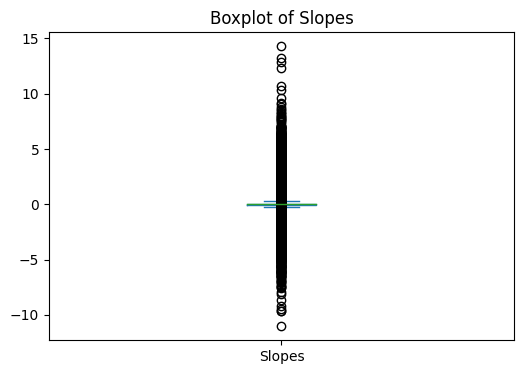

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(a)
# Select the column you want to analyze
selected_column = 'Slopes'

# Calculate z-scores for the selected column
z_scores = np.abs((df[selected_column] - df[selected_column].mean()) / df[selected_column].std())

# Set a threshold for outlier detection (e.g., z-score greater than 3)
outlier_threshold = 3

# Detect outliers
outliers = df[z_scores > outlier_threshold]

# Visualize outliers using a box plot
plt.figure(figsize=(6, 4))
df[selected_column].plot.box()
plt.title(f"Boxplot of {selected_column}")
plt.show()


In [ ]:
a = pd.DataFrame(df)
# Filter rows where 'TimeDiff' is less than 7
filtered_rows = df[df['TimeDiff'] < 7]

# Get the indices of the filtered rows
indices = filtered_rows.index

# Include the row before each filtered row
indices_to_include = indices.union(indices - 1).union(indices + 1)
all_indices = indices.union(indices_to_include)

# Select the rows based on the indices
result = df.loc[all_indices]
result

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes


In [ ]:
result

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes


In [ ]:
a

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes
0,2299,3640924,66.80,2559-11-11 09:40:06.053,2016-11-11 09:40:06.053,87.0,NaN
1,2299,4020970,67.20,2560-03-31 10:18:54.363,2017-03-31 10:18:54.363,140.0,0.002857
2,2299,4286612,69.20,2560-07-05 10:40:40.763,2017-07-05 10:40:40.763,96.0,0.020833
3,2299,4546471,63.60,2560-10-03 09:19:54.710,2017-10-03 09:19:54.710,89.0,-0.062921
4,2299,4801938,58.40,2561-01-04 09:03:28.847,2018-01-04 09:03:28.847,92.0,-0.056522
...,...,...,...,...,...,...,...
280078,3409733,10435209,49.13,2566-03-02 09:24:57.310,2023-03-02 09:24:57.310,83.0,-0.208313
280079,3432056,10235244,48.51,2566-01-09 12:31:53.220,2023-01-09 12:31:53.220,25.0,0.168400
280080,3432056,10306813,67.71,2566-01-27 12:22:43.000,2023-01-27 12:22:43.000,17.0,1.129412
280081,3432056,10408954,68.69,2566-02-24 21:05:12.747,2023-02-24 21:05:12.747,28.0,0.035000


In [ ]:
a.to_excel('LabSlope.xlsx', index=False)